In [114]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [115]:
from proj1_helpers import *
from validation_helpers import *
from plots import *
DATA_TRAIN_PATH = '../data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [116]:
from implementations import *

## Do your thing crazy machine learning thing here :) ...

In [4]:
split_x, split_y, split_ids = separate(y, tX, ids)

In [5]:
selection = dataStatistics(split_x)

Statistics 
Type :
0
[0.26145747 0.         0.         0.         1.         1.
 1.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 1.         1.         1.         1.         1.         0.        ]
Statistics 
Type :
1
[0.09751883 0.         0.         0.         1.         1.
 1.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         1.         1.         0.        ]
Statistics 
Type :
2
[0.05859584 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
Statistics 
Type :
3
[0.0

In [6]:
cleaned = removeNone(split_x, selection)



# Now we can either drop the lines with residual Nones or replace the Nones by the median value

In [7]:
cleaned_with_median = putMedianInsteadOfNone(cleaned)

cleaned_with_median_with_momentum = add_momentum_vector(cleaned_with_median)

In [8]:
dropped_x, dropped_y, dropped_ids = dropLineIfNone(cleaned, split_y, split_ids)


## At this point, the first values in each of the split data has a PRI_jet_num = 0, then 1 and so on. The data is clean and we can work with it.

## Generate predictions and save ouput in csv format for submission:

In [9]:
DATA_TEST_PATH = '../data/test.csv' 
y_donotUse, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
#separate data with respect to column 24 and remove None
split_x_test, _, split_ids_test =  separate(y_donotUse, tX_test, ids_test)


split_x_cleaned_test = removeNone(split_x_test, dataStatistics(split_x_test))

#median instead of None
split_x_with_median = putMedianInsteadOfNone(split_x_cleaned_test)

split_x_with_median_with_momentum = add_momentum_vector(split_x_with_median)

#line dropped when None
#split_x_drop_lines, split_y_dropped_split_indexes_dropped = dropLineIfNone(split_x_cleaned_test, _, split_ids_test)

#degrees for polynomial feature expension
degrees = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

y_res = []

acc = []

plot_data_per_jetnum = []


for i in range(len(cleaned_with_median)):
    
    
    
    #training: chose either cross calidation or cross validation for logistic regression with regularization
    #w_star, d, accuracy, training_set, plot_data = crossValidation(cleaned_with_median[i], split_y[i], 0.98, degrees ,6)
    w_star, d, accuracy, training_set, plot_data = crossValidationForLogistic_reg_with_loss(cleaned_with_median[i], split_y[i], 0.9, degrees ,6)
    
    
    #polynomial feature expension and normalization using the training data
    mean = np.mean(build_poly(training_set,d), axis = 0)
    std = np.std(build_poly(training_set,d), axis = 0)
    
      
    #put 1 if std = 0
    std = std + (std == 0)
    
    extended_and_normalized = (build_poly(split_x_with_median[i], d) - mean) / std
    
    #adding bias term
    bias = np.ones(shape=split_x_with_median[i].shape)          
    x_test_ready = np.c_[bias, extended_and_normalized]
    
    #prediction for least squares
    #y_res.append(predict_labels(w_star, x_test_ready))
    
    #prediction for logistic
    y_res.append(predict_labels_logistic(w_star, x_test_ready))
    


    acc.append(accuracy)
    plot_data_per_jetnum.append(plot_data)

print("Accuracy per jet nbr: \n")
print(acc)


Statistics 
Type :
0
[0.2605448 0.        0.        0.        1.        1.        1.
 0.        0.        0.        0.        0.        1.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        1.        1.        1.        1.        1.
 1.        0.       ]
Statistics 
Type :
1
[0.09834149 0.         0.         0.         1.         1.
 1.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         1.         1.         0.        ]
Statistics 
Type :
2
[0.05881481 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
Statistics 
Type :
3
[0.06376737 0.         0.     

lambda=0.00000,degree=14, gamma=0.41000, Training Loss=688708.3644440247, Testing Loss=83287.05060262501
lambda=0.00000,degree=14, gamma=0.61000, Training Loss=688879.7290670391, Testing Loss=93418.04398808022
lambda=0.00000,degree=14, gamma=0.81000, Training Loss=699695.2975332655, Testing Loss=107997.59158628443
lambda=0.00000,degree=15, gamma=0.01000, Training Loss=1852733.2065816168, Testing Loss=206943.8746222811
lambda=0.00000,degree=15, gamma=0.21000, Training Loss=1744738.868331446, Testing Loss=195601.49380683905
lambda=0.00000,degree=15, gamma=0.41000, Training Loss=1746642.3887609988, Testing Loss=202125.78029112
lambda=0.00000,degree=15, gamma=0.61000, Training Loss=1752029.6577556692, Testing Loss=212406.87123562352
lambda=0.00000,degree=15, gamma=0.81000, Training Loss=1767280.6213269376, Testing Loss=227669.0069228728
lambda=0.00000,degree=16, gamma=0.01000, Training Loss=1482087.1342017197, Testing Loss=157704.12152207876
lambda=0.00000,degree=16, gamma=0.21000, Trainin

lambda=0.10000,degree=14, gamma=0.01000, Training Loss=1759211.1869425513, Testing Loss=693689.3629881621
lambda=0.10000,degree=14, gamma=0.21000, Training Loss=337193138.18600845, Testing Loss=336486233.0279447
lambda=0.10000,degree=14, gamma=0.41000, Training Loss=366839338.7465525, Testing Loss=366132416.12539124
lambda=0.10000,degree=14, gamma=0.61000, Training Loss=1199911015.72632, Testing Loss=1199255259.1547303
lambda=0.10000,degree=14, gamma=0.81000, Training Loss=1769019538.660829, Testing Loss=1768358586.5271337
lambda=0.10000,degree=15, gamma=0.01000, Training Loss=2511147.642759745, Testing Loss=763601.5475296862
lambda=0.10000,degree=15, gamma=0.21000, Training Loss=132047661.59118079, Testing Loss=130341869.48579088
lambda=0.10000,degree=15, gamma=0.41000, Training Loss=339664770.44214135, Testing Loss=338284271.9836188
lambda=0.10000,degree=15, gamma=0.61000, Training Loss=788258740.1733695, Testing Loss=787615217.4275476
lambda=0.10000,degree=15, gamma=0.81000, Trainin

lambda=0.20000,degree=13, gamma=0.61000, Training Loss=719630973.7066249, Testing Loss=718926654.8589602
lambda=0.20000,degree=13, gamma=0.81000, Training Loss=1281162779.011339, Testing Loss=1280455908.399248
lambda=0.20000,degree=14, gamma=0.01000, Training Loss=2241423.8809092315, Testing Loss=1185421.311684204
lambda=0.20000,degree=14, gamma=0.21000, Training Loss=234427005.2677524, Testing Loss=233768332.83891314
lambda=0.20000,degree=14, gamma=0.41000, Training Loss=901174570.2397978, Testing Loss=900507956.6489261
lambda=0.20000,degree=14, gamma=0.61000, Training Loss=722926713.6635984, Testing Loss=722220704.6556474
lambda=0.20000,degree=14, gamma=0.81000, Training Loss=1251853543.1759608, Testing Loss=1251146300.9889796
lambda=0.20000,degree=15, gamma=0.01000, Training Loss=2720897.353093419, Testing Loss=1486756.4593180998
lambda=0.20000,degree=15, gamma=0.21000, Training Loss=262354102.99438986, Testing Loss=261697484.48247203
lambda=0.20000,degree=15, gamma=0.41000, Trainin

lambda=0.00000,degree=13, gamma=0.21000, Training Loss=838255.1089025338, Testing Loss=93318.26945084347
lambda=0.00000,degree=13, gamma=0.41000, Training Loss=834067.3232317022, Testing Loss=101990.02761767106
lambda=0.00000,degree=13, gamma=0.61000, Training Loss=851691.2566394066, Testing Loss=115678.31397015214
lambda=0.00000,degree=13, gamma=0.81000, Training Loss=868364.7805339226, Testing Loss=136089.86651494555
lambda=0.00000,degree=14, gamma=0.01000, Training Loss=1256349.5081165098, Testing Loss=141795.0398679439
lambda=0.00000,degree=14, gamma=0.21000, Training Loss=1099824.474475602, Testing Loss=123888.40413484418
lambda=0.00000,degree=14, gamma=0.41000, Training Loss=1100438.3331032132, Testing Loss=132889.73846222888
lambda=0.00000,degree=14, gamma=0.61000, Training Loss=1112751.2424350996, Testing Loss=147187.68815245316
lambda=0.00000,degree=14, gamma=0.81000, Training Loss=1132224.5101857139, Testing Loss=166903.69696180025
lambda=0.00000,degree=15, gamma=0.01000, Tra

lambda=0.10000,degree=12, gamma=0.81000, Training Loss=484823088.94548786, Testing Loss=484137820.1192405
lambda=0.10000,degree=13, gamma=0.01000, Training Loss=2194787.3647091957, Testing Loss=841054.232386107
lambda=0.10000,degree=13, gamma=0.21000, Training Loss=97255763.81670053, Testing Loss=96579823.14574938
lambda=0.10000,degree=13, gamma=0.41000, Training Loss=184061833.72552857, Testing Loss=183419708.88087955
lambda=0.10000,degree=13, gamma=0.61000, Training Loss=333698602.4995538, Testing Loss=332450578.7867525
lambda=0.10000,degree=13, gamma=0.81000, Training Loss=2187109279.232638, Testing Loss=2186343899.819791
lambda=0.10000,degree=14, gamma=0.01000, Training Loss=1929734.2001327975, Testing Loss=812023.1308982414
lambda=0.10000,degree=14, gamma=0.21000, Training Loss=172704429.53829345, Testing Loss=171935891.44545868
lambda=0.10000,degree=14, gamma=0.41000, Training Loss=189613506.56887937, Testing Loss=188969903.8391512
lambda=0.10000,degree=14, gamma=0.61000, Trainin

lambda=0.20000,degree=12, gamma=0.41000, Training Loss=201054421.05199108, Testing Loss=200298272.34394795
lambda=0.20000,degree=12, gamma=0.61000, Training Loss=290904898.0129235, Testing Loss=290216510.7146291
lambda=0.20000,degree=12, gamma=0.81000, Training Loss=3979005596.1681333, Testing Loss=3978238040.8987303
lambda=0.20000,degree=13, gamma=0.01000, Training Loss=2607622.409452704, Testing Loss=1547386.0459904438
lambda=0.20000,degree=13, gamma=0.21000, Training Loss=115789161.88359907, Testing Loss=115019490.48752263
lambda=0.20000,degree=13, gamma=0.41000, Training Loss=280436883.39500594, Testing Loss=279129563.01406056
lambda=0.20000,degree=13, gamma=0.61000, Training Loss=464424428.5411865, Testing Loss=463096663.19926786
lambda=0.20000,degree=13, gamma=0.81000, Training Loss=3676781255.7423353, Testing Loss=3676014149.4410434
lambda=0.20000,degree=14, gamma=0.01000, Training Loss=2499435.559632263, Testing Loss=1458080.1071589272
lambda=0.20000,degree=14, gamma=0.21000, T

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

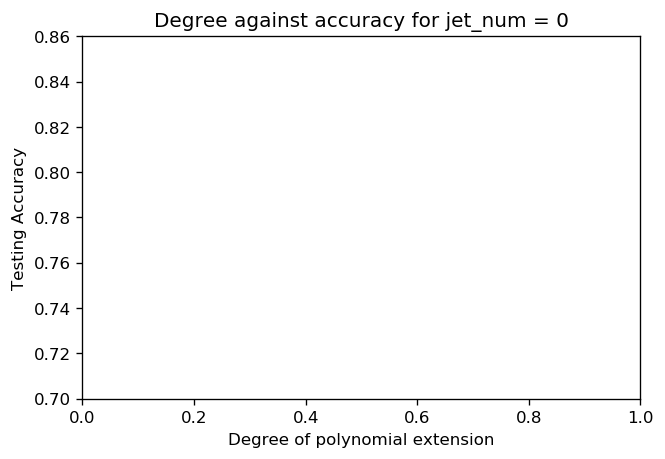

In [54]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

for i in range(len(plot_data_per_jetnum)):
    jet_num = plot_data_per_jetnum[i]



    X = np.array([x[0] for x in jet_num])
    Y = np.array([x[1] for x in jet_num])
    Z = np.array([x[3] for x in jet_num])
    

    plt.figure(dpi=120)
    plt.title('Degree against accuracy for jet_num = %d' %i)
    plt.xlabel('Degree of polynomial extension')
    plt.ylabel('Testing Accuracy')

    axes = plt.gca()
    axes.set_ylim([0.7,0.86])

    plt.stem(Y, Z, use_line_collection=True, label="hello")
    plt.savefig("cross_with_momentum_"+str(i))
    plt.show()


In [119]:
OUTPUT_PATH = '../data/submission.csv'
#reassemble the data for the submission
y_pred = put_together(y_res, split_ids_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)